In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import skimage.io as tiffio

In [3]:
g2_rs = np.load("g2_rs.npy")

In [3]:
g2_rs.shape

(746, 784, 200)

In [4]:
def KWW_curve(t,A,tau,beta):
    return (1+A*np.exp(-2*np.power(t/tau,beta)))

In [5]:
def t_resampled(dt,N,M):
    t_rs = np.zeros(M, dtype = np.float)
    for i in range(M):
        t_rs[i] = np.power(10, np.log10(dt) + i*np.log10(N-1)/(M-1))
    return t_rs

In [6]:
t_rs = t_resampled(0.25,4000,200)

In [7]:
def fit_g2_KWW(t_rs,g2_rs_i):
    popt, pcov = curve_fit(KWW_curve, t_rs, g2_rs_i, p0 = [g2_rs_i[0]-1,t_rs[0]*200,1])
    perr = np.sqrt(np.diag(pcov))
    fit_error = np.linalg.norm(perr/popt)
    
    return popt, fit_error

In [8]:
test_param, test_err = fit_g2_KWW(t_rs, g2_rs[400,400])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [9]:
print(*test_param, test_err)

6.576560288764109e-06 4.233547086481614 1.865301025350473 0.24876567238701902


[]

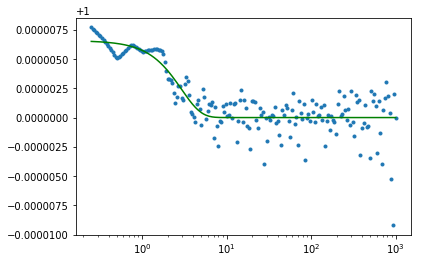

In [10]:
plt.plot(t_rs, g2_rs[400,400], '.')
plt.plot(t_rs, KWW_curve(t_rs,*test_param),'g-')
plt.semilogx()

In [11]:
#perform curve fit for all non-NaN pixels
def fit_all_pixels(t_rs, g2_rs):
    (x,y,z) = g2_rs.shape
    
    A_map = np.zeros((x,y), dtype = np.float)
    tau_map = np.zeros((x,y), dtype = np.float)
    beta_map = np.zeros((x,y), dtype = np.float)
    err_map = np.zeros((x,y), dtype = np.float)
    
    for i in range(x):
        for j in range(y):
            if np.isnan(g2_rs[i][j][0]):
                A_map[i][j] = tau_map[i][j] = beta_map[i][j] = err_map[i][j] = np.nan
            else:
                try:
                    params, error = fit_g2_KWW(t_rs,g2_rs[i][j])
                    (A_map[i][j], tau_map[i][j], beta_map[i][j]) = params
                    err_map[i][j] = error
                except (RuntimeError):
                    A_map[i][j] = tau_map[i][j] = beta_map[i][j] = err_map[i][j] = np.nan
            
            if((i*y+j)/(x*y)*100 % 10 == 0):
                print("Progress%=", (i*y+j)/(x*y)*100)
                
    return A_map, tau_map, beta_map, err_map

In [12]:
A_map, tau_map, beta_map, err_map = fit_all_pixels(t_rs, g2_rs)

Progress%= 0.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
A_map[400,400], tau_map[400,400], beta_map[400,400], err_map[400,400]

(6.576560288764109e-06,
 4.233547086481614,
 1.865301025350473,
 0.24876567238701902)

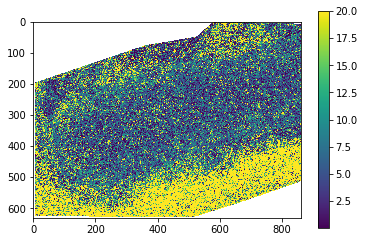

In [14]:
plt.imshow(tau_map, vmax =20)
plt.colorbar()

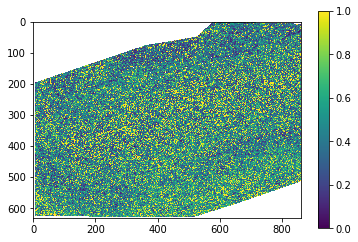

In [17]:
plt.imshow(beta_map, vmin=0, vmax =1)
plt.colorbar()

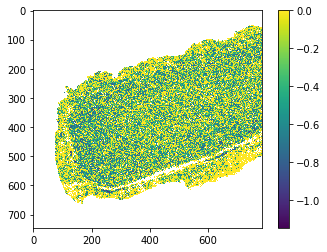

In [17]:
plt.imshow(np.log10(err_map),vmax = 0)
plt.colorbar()

(array([4.0000e+00, 0.0000e+00, 9.0000e+00, 5.1900e+02, 2.6120e+03,
        5.7550e+03, 8.0390e+03, 9.3100e+03, 9.7940e+03, 1.0074e+04,
        1.0340e+04, 1.0948e+04, 1.1427e+04, 1.2094e+04, 1.2665e+04,
        1.3112e+04, 1.3595e+04, 1.3796e+04, 1.4347e+04, 1.4541e+04,
        1.4187e+04, 1.4142e+04, 1.4265e+04, 1.3753e+04, 1.3475e+04,
        1.2786e+04, 1.2496e+04, 1.2291e+04, 1.1453e+04, 1.1020e+04,
        1.0309e+04, 9.6100e+03, 9.2290e+03, 8.4820e+03, 7.9950e+03,
        7.4640e+03, 6.7540e+03, 6.4580e+03, 5.9540e+03, 5.5190e+03,
        5.0600e+03, 4.6680e+03, 4.3630e+03, 4.0170e+03, 3.7330e+03,
        3.4360e+03, 3.1690e+03, 2.8430e+03, 2.6700e+03, 2.5940e+03,
        2.3310e+03, 2.1580e+03, 1.9560e+03, 1.8320e+03, 1.7080e+03,
        1.5910e+03, 1.4910e+03, 1.3080e+03, 1.2860e+03, 1.1850e+03,
        1.0020e+03, 1.0250e+03, 9.6800e+02, 8.7600e+02, 8.3800e+02,
        7.9300e+02, 7.5100e+02, 6.5900e+02, 6.3700e+02, 6.6000e+02,
        5.8600e+02, 5.5000e+02, 4.6700e+02, 4.63

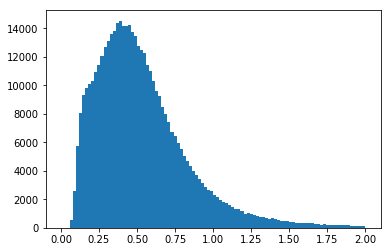

In [19]:
plt.hist(beta_map[~np.isnan(beta_map)],bins = 100, range=(0,2))

In [93]:
mask = np.loadtxt("Full_ROI - python.itx")

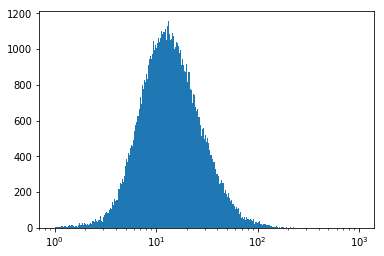

In [17]:
plt.hist(tau_map[~np.isnan(tau_map)],10**np.linspace(0, 3, 1000), log = False)
plt.xscale('log')

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 2.000e+01,
        3.000e+01, 3.000e+01, 7.900e+01, 1.180e+02, 1.970e+02, 2.710e+02,
        3.820e+02, 5.550e+02, 7.320e+02, 9.530e+02, 1.188e+03, 1.579e+03,
        1.891e+03, 2.284e+03, 2.750e+03, 3.122e+03, 3.636e+03, 4.169e+03,
        4.718e+03, 5.311e+03, 5.854e+03, 6.487e+03, 7.054e+03, 7.630e+03,
        8.047e+03, 8.487e+03, 8.818e+03, 9.286e+03, 9.449e+03, 9.793e+03,
        9.687e+03, 9.782e+03, 9.670e+03, 9.333e+03, 9.218e+03, 8.858e+03,
        8.642e+03, 8.056e+03, 7.772e+03, 7.303e+03, 6.846e+03, 6.351e+03,
        5.837e+03, 5.551e+03, 4.906e+03, 4.609e+03, 4.045e+03, 3.766e+03,
        3.431e+03, 3.061e+03, 2.807e+03, 2.484e+03, 2.237e+03, 1.927e+03,
        1.732e+03, 1.624e+03, 1.373e+03, 1.263e+03, 1.078e+03, 9.790e+02,
        7.650e+02, 7.040e+02, 6.310e+02, 5.460e+02, 4.770e+02, 4.290e+02,
        3.640e+02, 3.340e+02, 2.550e+02, 2.570e+02, 1.760e+02, 1.860e+02,
        1.590e+02, 1.380e+02, 1.110e+0

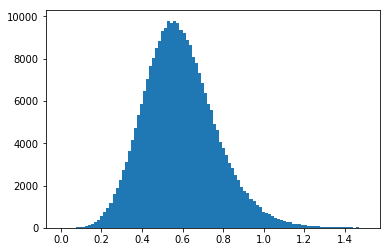

In [13]:
plt.hist(beta_map[~np.isnan(beta_map)],bins = 100, range=(0,1.5))

In [20]:
np.save("A_map",A_map)
np.save("tau_map",tau_map)
np.save("beta_map",beta_map)
np.save("err_map",err_map)

In [11]:
tiffio.imsave("tau_map.tif",tau_map,plugin = "tifffile")

C:\Users\deb2c\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
